In [4]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

warnings.filterwarnings('ignore')


In [3]:
class point:
    def __init__(self):
        self.data = []
        self.classified = False
        self.cluster = 0

class dbscan:
    def __init__(self, eps, min_samples):
        self.points = []
        self.eps = eps
        self.min_samples = min_samples
        self.clusters = 0
        self.labels_ = []

    def _loadData(self, X):
        self.points = []
        for i in range(len(X)):
            p = point()
            p.data = X[i]
            self.points.append(p)

    def fit(self, X):
        self._loadData(X)
        clusterId = 1
        for i in range(len(self.points)):
            if self.points[i].classified == False:
                self.points[i].classified = True
                neighborPts = self._regionQuery(self.points[i])
                if len(neighborPts) < self.min_samples:
                    self.points[i].cluster = -1
                else:
                    self._expandCluster(self.points[i], neighborPts, clusterId)
                    clusterId = clusterId + 1

    def _regionQuery(self, p):
        distances = euclidean_distances([p.data], [pt.data for pt in self.points])[0]
        neighbors = [i for i, d in enumerate(distances) if d < self.eps]
        return neighbors

    def _expandCluster(self, p, neighborPts, clusterId):
        p.cluster = clusterId
        i = 0
        while i < len(neighborPts):
            nextPoint = self.points[neighborPts[i]]
            if not nextPoint.classified:
                nextPoint.classified = True
                nextNeighborPts = self._regionQuery(nextPoint)
                if len(nextNeighborPts) >= self.min_samples:
                    neighborPts += nextNeighborPts
            if nextPoint.cluster == 0:
                nextPoint.cluster = clusterId
            i += 1

In [30]:
def plot_results(X, labels_custom, labels_sklearn, eps, min_samples):
    '''Função para plotar os resultados obtidos'''

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    fig.suptitle(f'DBSCAN - eps:{eps} - minSamples: {min_samples}', fontsize=10)

    axes[0].scatter(X[:, 0], X[:, 1], c=labels_custom)
    axes[0].set_title('Custom DBSCAN', fontsize=8)

    axes[1].scatter(X[:, 0], X[:, 1], c=labels_sklearn)
    axes[1].set_title('scikit-learn DBSCAN', fontsize=8)

    plt.show()

def eval_func(function, X, labels):
    unique_labels = len(set(labels))
    eval_result = "N/A"
    if unique_labels > 1:
        eval_result = function(X, labels)

    return eval_result


def evaluate_models(X, labels_custom, labels_sklearn, eps, min_samples):
    '''Avalia e compara os modelos'''
    silhouette_custom = eval_func(silhouette_score, X, labels_custom)
    silhouette_sklearn = eval_func(silhouette_score, X, labels_sklearn)

    davies_bouldin_custom = eval_func(davies_bouldin_score, X, labels_custom)
    davies_bouldin_sklearn = eval_func(davies_bouldin_score, X, labels_sklearn)

    calinski_harabasz_custom = eval_func(calinski_harabasz_score, X, labels_custom)
    calinski_harabasz_sklearn = eval_func(calinski_harabasz_score, X, labels_sklearn)

    results = {
        'eps': eps,
        'min_samples': min_samples,
        'silhouette_custom': silhouette_custom,
        'silhouette_sklearn': silhouette_sklearn,
        'davies_bouldin_custom': davies_bouldin_custom,
        'davies_bouldin_sklearn': davies_bouldin_sklearn,
        'calinski_harabasz_custom': calinski_harabasz_custom,
        'calinski_harabasz_sklearn': calinski_harabasz_sklearn
    }

    return pd.DataFrame(data=[results])

def test_models_plot(X, eps=0.5, min_samples=5):
    model_custom = dbscan(eps=eps, min_samples=min_samples)
    model_custom.fit(X)
    labels_custom = [p.cluster for p in model_custom.points]

    dbscan_sklearn = DBSCAN(eps=eps, min_samples=min_samples)
    labels_sklearn = dbscan_sklearn.fit_predict(X)

    plot_results(X, labels_custom, labels_sklearn, eps, min_samples)
    print(evaluate_models(X, labels_custom, labels_sklearn, eps, min_samples))

def test_models(X, eps=0.5, min_samples=5):
    model_custom = dbscan(eps=eps, min_samples=min_samples)
    model_custom.fit(X)
    labels_custom = [p.cluster for p in model_custom.points]

    dbscan_sklearn = DBSCAN(eps=eps, min_samples=min_samples)
    labels_sklearn = dbscan_sklearn.fit_predict(X)

    return evaluate_models(X, labels_custom, labels_sklearn, eps, min_samples)


### Teste Inicial com a implementação própria e com a versão do scikit
- O teste inicial foi realizado com o dataset IRIS, alterando o valor minimo de 

In [6]:
iris = load_iris()
X = iris.data

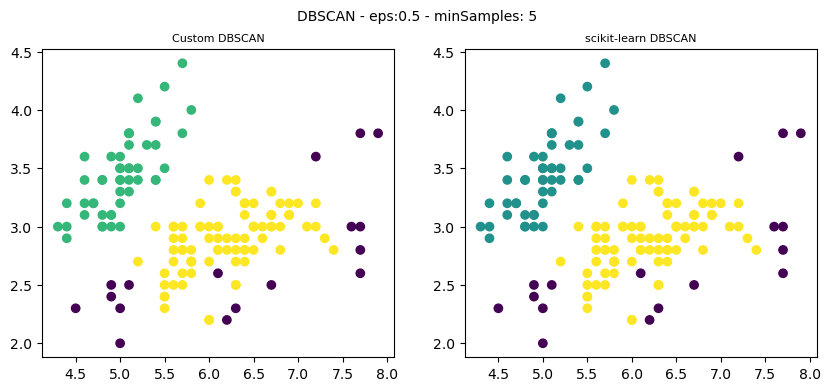

   eps  min_samples  silhouette_custom  silhouette_sklearn  \
0  0.5            5           0.486034            0.486034   

   davies_bouldin_custom  davies_bouldin_sklearn  calinski_harabasz_custom  \
0               7.222448                7.222448                220.297515   

   calinski_harabasz_sklearn  
0                 220.297515  


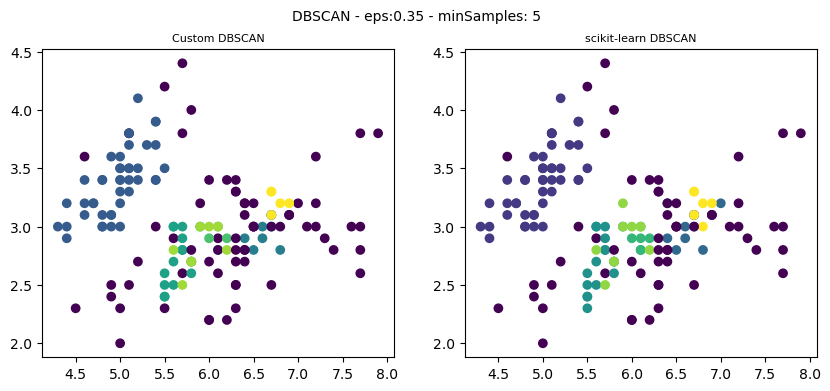

    eps  min_samples  silhouette_custom  silhouette_sklearn  \
0  0.35            5           0.065403            0.116184   

   davies_bouldin_custom  davies_bouldin_sklearn  calinski_harabasz_custom  \
0               2.868753                3.127309                 47.233136   

   calinski_harabasz_sklearn  
0                  48.235986  


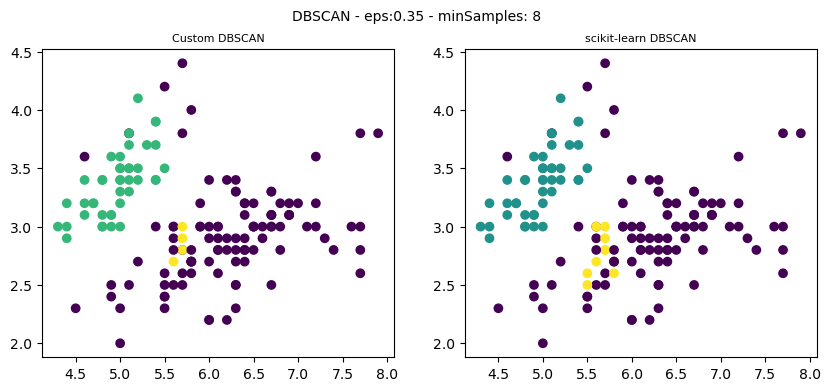

    eps  min_samples  silhouette_custom  silhouette_sklearn  \
0  0.35            8           0.092825            0.175122   

   davies_bouldin_custom  davies_bouldin_sklearn  calinski_harabasz_custom  \
0               1.260687                1.230475                123.684411   

   calinski_harabasz_sklearn  
0                 128.444547  


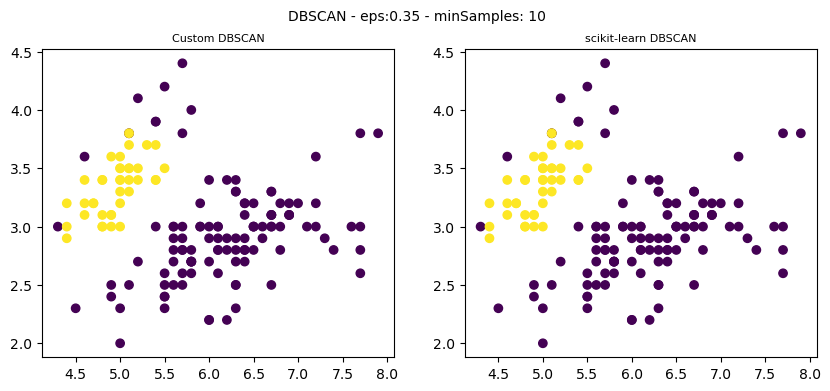

    eps  min_samples  silhouette_custom  silhouette_sklearn  \
0  0.35           10           0.533914            0.533914   

   davies_bouldin_custom  davies_bouldin_sklearn  calinski_harabasz_custom  \
0               0.477989                0.477989                175.619812   

   calinski_harabasz_sklearn  
0                 175.619812  


In [37]:
test_models_plot(X)
test_models_plot(X, eps=0.35, min_samples=5)
test_models_plot(X, eps=0.35, min_samples=8)
test_models_plot(X, eps=0.35, min_samples=10)

- A seguir é realizado um teste variando os valores de eps e também os valores de min samples para identificar o comportamento da variação desses parâmetros na implementação e assim poder comparar como os valores obtidos com a implementação do scikit-learn utilizada como referência.

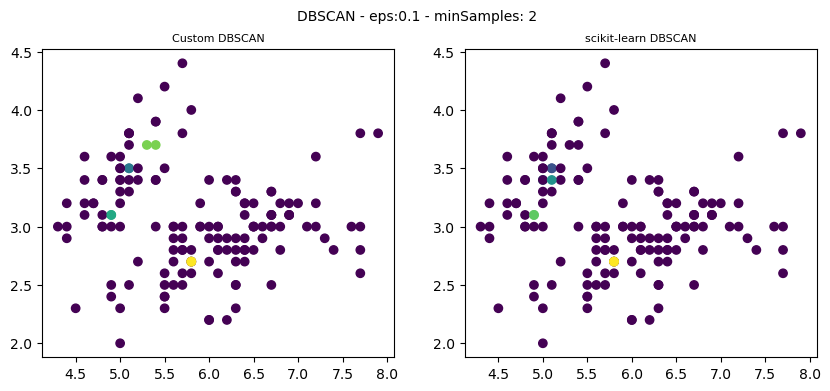

   eps  min_samples  silhouette_custom  silhouette_sklearn  \
0  0.1            2          -0.529178           -0.533442   

   davies_bouldin_custom  davies_bouldin_sklearn  calinski_harabasz_custom  \
0               0.943937                0.942412                   2.75456   

   calinski_harabasz_sklearn  
0                   2.767525  


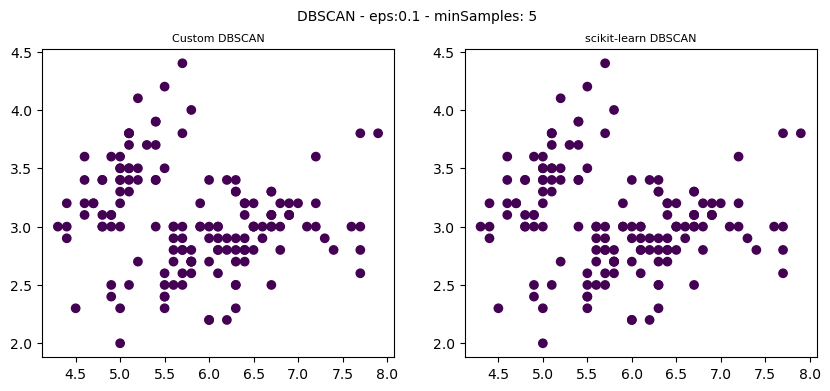

   eps  min_samples silhouette_custom silhouette_sklearn  \
0  0.1            5               N/A                N/A   

  davies_bouldin_custom davies_bouldin_sklearn calinski_harabasz_custom  \
0                   N/A                    N/A                      N/A   

  calinski_harabasz_sklearn  
0                       N/A  


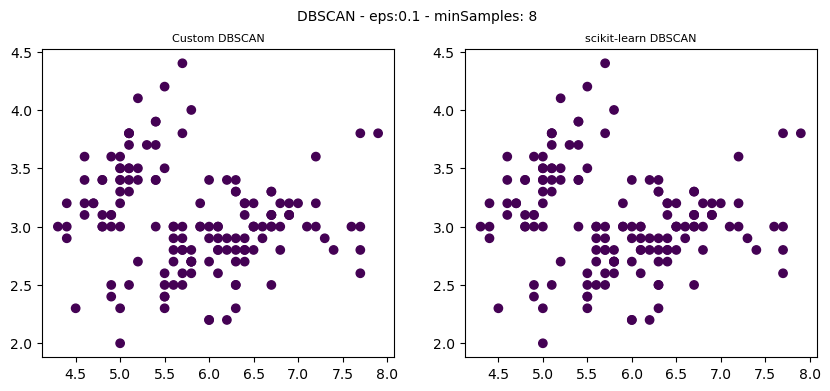

   eps  min_samples silhouette_custom silhouette_sklearn  \
0  0.1            8               N/A                N/A   

  davies_bouldin_custom davies_bouldin_sklearn calinski_harabasz_custom  \
0                   N/A                    N/A                      N/A   

  calinski_harabasz_sklearn  
0                       N/A  


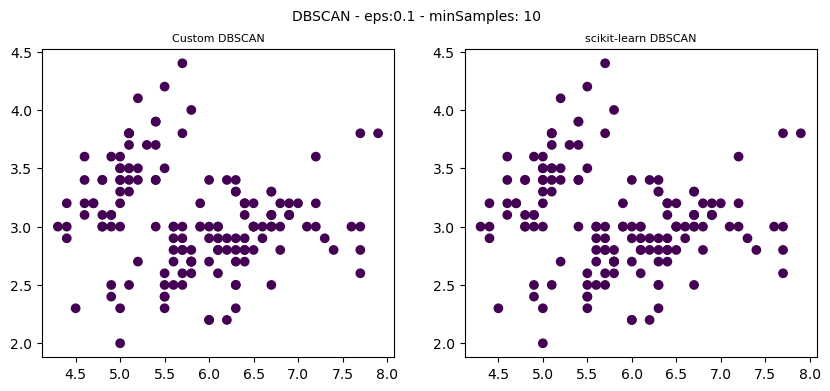

   eps  min_samples silhouette_custom silhouette_sklearn  \
0  0.1           10               N/A                N/A   

  davies_bouldin_custom davies_bouldin_sklearn calinski_harabasz_custom  \
0                   N/A                    N/A                      N/A   

  calinski_harabasz_sklearn  
0                       N/A  


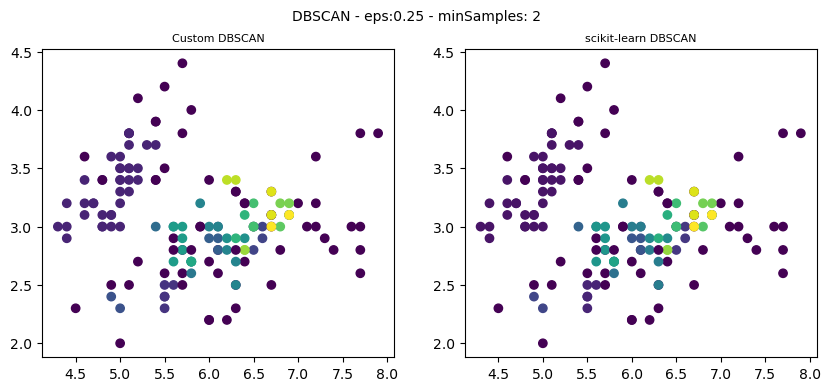

    eps  min_samples  silhouette_custom  silhouette_sklearn  \
0  0.25            2            0.03196             0.03196   

   davies_bouldin_custom  davies_bouldin_sklearn  calinski_harabasz_custom  \
0               2.751338                2.751338                  9.618516   

   calinski_harabasz_sklearn  
0                   9.618516  


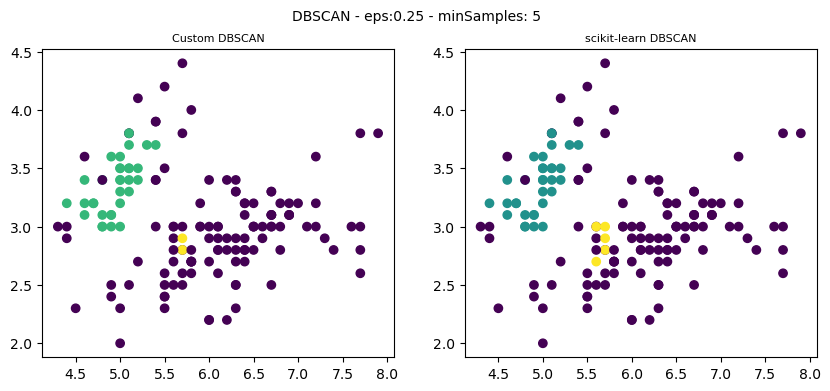

    eps  min_samples  silhouette_custom  silhouette_sklearn  \
0  0.25            5          -0.091667           -0.050988   

   davies_bouldin_custom  davies_bouldin_sklearn  calinski_harabasz_custom  \
0                2.16159                2.114469                 57.670855   

   calinski_harabasz_sklearn  
0                  58.015227  


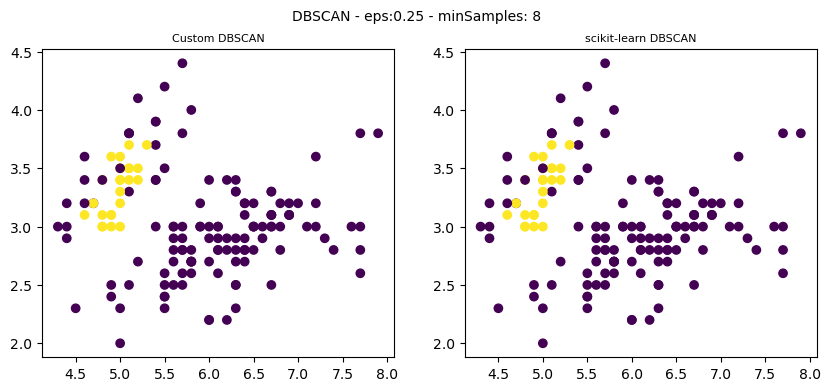

    eps  min_samples  silhouette_custom  silhouette_sklearn  \
0  0.25            8           0.325627            0.325627   

   davies_bouldin_custom  davies_bouldin_sklearn  calinski_harabasz_custom  \
0               0.612404                0.612404                 62.401862   

   calinski_harabasz_sklearn  
0                  62.401862  


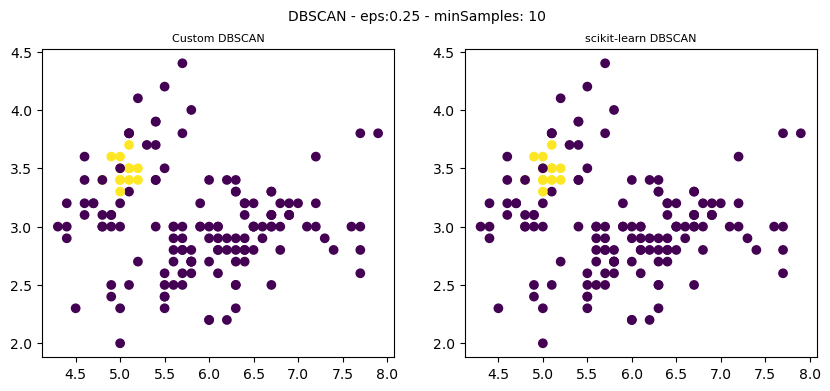

    eps  min_samples  silhouette_custom  silhouette_sklearn  \
0  0.25           10           0.175759            0.175759   

   davies_bouldin_custom  davies_bouldin_sklearn  calinski_harabasz_custom  \
0               0.684945                0.684945                  25.58727   

   calinski_harabasz_sklearn  
0                   25.58727  


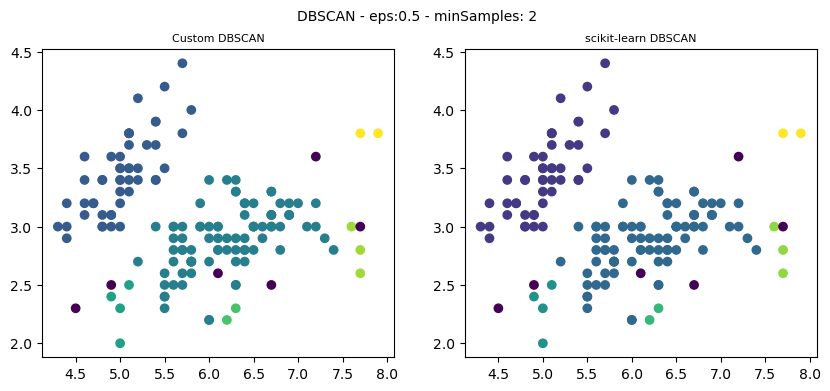

   eps  min_samples  silhouette_custom  silhouette_sklearn  \
0  0.5            2           0.190771            0.190771   

   davies_bouldin_custom  davies_bouldin_sklearn  calinski_harabasz_custom  \
0               5.854565                5.854565                110.466179   

   calinski_harabasz_sklearn  
0                 110.466179  


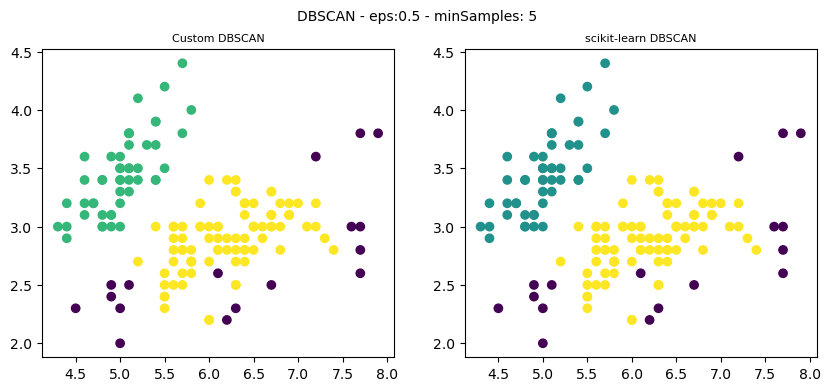

   eps  min_samples  silhouette_custom  silhouette_sklearn  \
0  0.5            5           0.486034            0.486034   

   davies_bouldin_custom  davies_bouldin_sklearn  calinski_harabasz_custom  \
0               7.222448                7.222448                220.297515   

   calinski_harabasz_sklearn  
0                 220.297515  


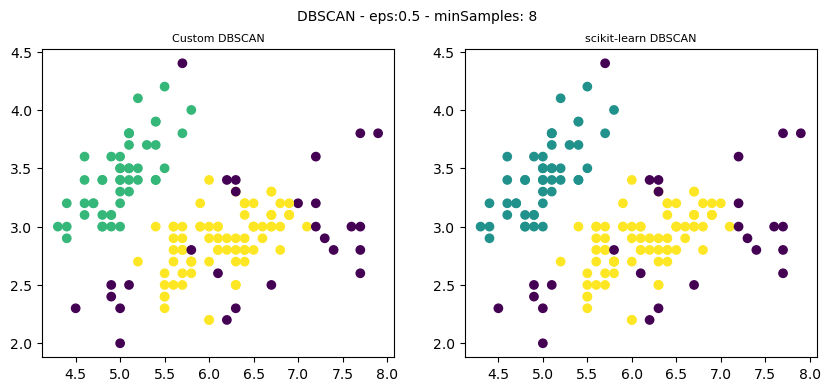

   eps  min_samples  silhouette_custom  silhouette_sklearn  \
0  0.5            8           0.442005            0.450347   

   davies_bouldin_custom  davies_bouldin_sklearn  calinski_harabasz_custom  \
0               3.938949                4.057209                202.727853   

   calinski_harabasz_sklearn  
0                 202.372212  


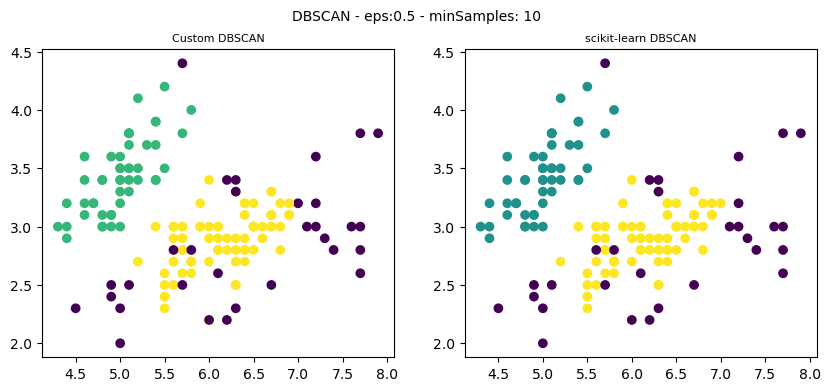

   eps  min_samples  silhouette_custom  silhouette_sklearn  \
0  0.5           10           0.415184            0.422685   

   davies_bouldin_custom  davies_bouldin_sklearn  calinski_harabasz_custom  \
0                3.70833                3.753819                203.486883   

   calinski_harabasz_sklearn  
0                 203.323436  


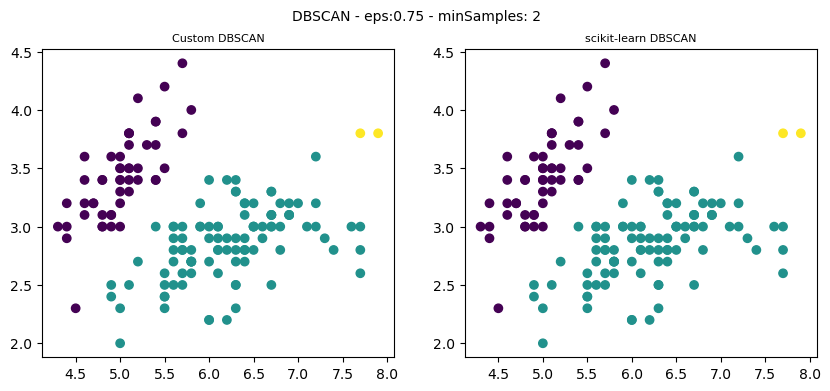

    eps  min_samples  silhouette_custom  silhouette_sklearn  \
0  0.75            2           0.512111            0.512111   

   davies_bouldin_custom  davies_bouldin_sklearn  calinski_harabasz_custom  \
0               0.447154                0.447154                277.994676   

   calinski_harabasz_sklearn  
0                 277.994676  


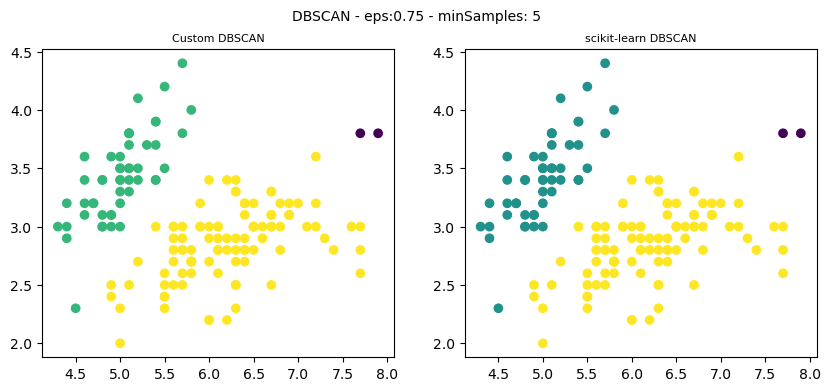

    eps  min_samples  silhouette_custom  silhouette_sklearn  \
0  0.75            5           0.512111            0.512111   

   davies_bouldin_custom  davies_bouldin_sklearn  calinski_harabasz_custom  \
0               0.447154                0.447154                277.994676   

   calinski_harabasz_sklearn  
0                 277.994676  


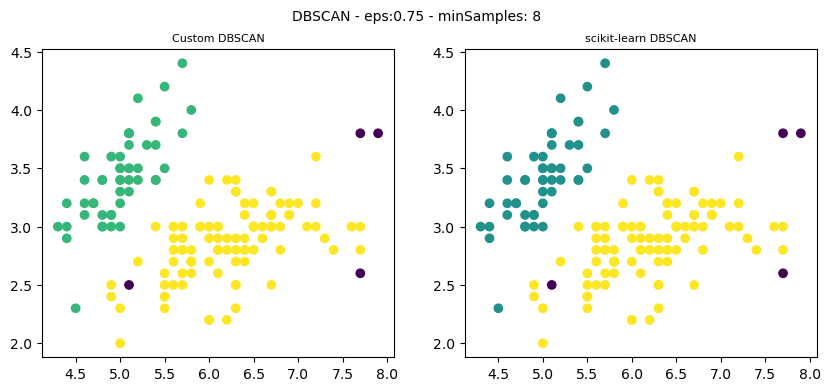

    eps  min_samples  silhouette_custom  silhouette_sklearn  \
0  0.75            8           0.547987            0.547987   

   davies_bouldin_custom  davies_bouldin_sklearn  calinski_harabasz_custom  \
0               1.627811                1.627811                263.831917   

   calinski_harabasz_sklearn  
0                 263.831917  


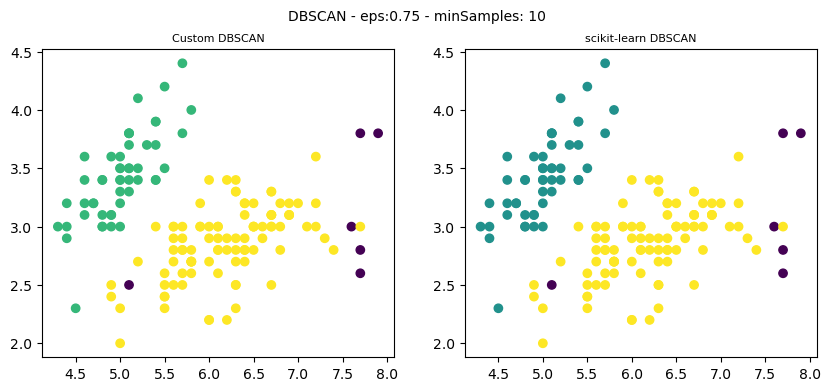

    eps  min_samples  silhouette_custom  silhouette_sklearn  \
0  0.75           10           0.548283            0.548283   

   davies_bouldin_custom  davies_bouldin_sklearn  calinski_harabasz_custom  \
0               1.070835                1.070835                 286.35076   

   calinski_harabasz_sklearn  
0                  286.35076  


""


In [38]:
results = pd.DataFrame()
min_samples = [2, 5, 8, 10]
eps = [0.1, 0.25, 0.5, 0.75]

for e in eps:
    for m in min_samples:
        results = results.append(test_models_plot(X, eps=e, min_samples=m))
        
results